#### MACHINE LEARNING EXERCISE: CLASSIFICATION
# TELCO CUSTOMER CHURN

#### Models
* Logistic Regression
* K-Nearest Neighbors
* Naive Bayes
* Decision Trees
* Random Forest Classifier
* XGBoost

#### About
* "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Target Variable
* Churn (Yes / No)

#### Features
1. gender
1. SeniorCitizen
1. Partner
1. Dependents
1. tenure
1. PhoneService
1. MultipleLines
1. InternetService
1. OnlineSecurity
1. OnlineBackup
1. DeviceProtection
1. TechSupport
1. StreamingTV
1. StreamingMovies
1. Contract
1. PaperlessBilling
1. PaymentMethod
1. MonthlyCharges
1. TotalCharges

#### Source
* https://www.kaggle.com/blastchar/telco-customer-churn

## Import Libraries

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
##### Other Libraries #####

## ML Algorithms ##
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## To visualize decision tree ##
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## For building models ##
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate 

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

C:\Users\Mystycalpha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Load the Dataset
First of all, let us load the dataset then check if it is properly loaded by showing a snippet of the data and checking its columns.

In [3]:
### Load the data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col="customerID")

### Check if the data is properly loaded
print("Size of the dataset:", df.shape)
df.head()

Size of the dataset: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the data snippet above, majority of the columns have data in words/strings. Only `tenure`, `MonthlyCharges` and `TotalCharges` are the columns containing continuous numbers. While the `SeniorCitizen` also contains numbers, it only has two distinct values which are `0` and `1`.

Below is the list of columns of this dataset, along with the datatypes of the columns.

In [4]:
### List the columns along with its type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 660.3+ KB

Columns with data in *Strings* are considered *object* while columns with numerical data are either *int* or *float*.

The only numerical columns should be `SeniorCitizen`, `tenure`, `MonthlyCharges` and `TotalCharges`. But the column type of`TotalCharges` is object, so we shall inspect it further.

## Explore the Dataset

Let us look at the summary of statistics of the data. For now, the numerical columns will only be displayed.

In [5]:
### Summary of statistics for numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Notice that the minimum value at `tenure` column is 0, which may mean that that customer just started availing the service.

Now, let us look at the summary of categorical columns.

In [6]:
### Summary of statistics for categorical data
df.describe(include="O")

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


From the table above, we can see the number of distinct values and the most common value per categorical column. 

If we look at `TotalCharges` column, the top values is `" "` or space. It has 6531 distinct values out of 7043 rows which is very unideal for a categorical column.

Let us list the distinct values of `TotalCharges` column.

In [7]:
### Find the string in TotalCharges column
df["TotalCharges"].value_counts()[:10]

         11
20.2     11
19.75     9
19.9      8
19.65     8
20.05     8
45.3      7
19.55     7
20.15     6
19.45     6
Name: TotalCharges, dtype: int64

Looks like the `" "`/space values in the `TotalCharges` column cause problems in parsing this column into numerical.

Below are the 11 rows containing `TotalCharges` equals to space.

In [8]:
### Inspect the rows with TotalCharges==" "
df[ df["TotalCharges"]==" " ]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


We can observed from the table above that the rows where `TotalCharges == " "` did not churn, but most notably, also have `tenure == 0`. So, let's inpect further rows wherein `tenure == 0`.

In [9]:
### Display the number of zero values 
print("---Count zero values---")
print("Tenure: {}".format( df["tenure"].value_counts()[0] ))

df[ df["tenure"]==0 ]

---Count zero values---
Tenure: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


This proves that the rows that have `TotalCharges == " "` also have `tenure == 0`. This means that these customers just availed the service and have not been regularly charged for the service. 

Let us remove these rows since it has incomplete data and may cause problems for modelling.

In [10]:
### Remove rows where tenure = 0 and TotalCharges is not numerical 
df1 = df.drop(df[ df["tenure"]==0 ].index, axis=0)

### Convert TotalCharges column from String to float
df1["TotalCharges"] = df1["TotalCharges"].astype(float)

### Check df1 to see if transformations are successful
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Now that the problems with `tenure` and `TotalCharges` are fixed, we can further clean the data to be machine readable. 

Let's convert those categories or strings per column into numerical labels using `LabelEncoder`. Listed below are the categories per column along with its transformation into numerical labels.

In [11]:
df_clean = df1
le = {}

print("-----Value for Categorical Columns-----")
for col in df_clean.columns:
    if not col in ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]:
        print( "--{}--\n{}".format(col, df_clean[col].value_counts()) )
        le[col] = LabelEncoder()
        df_clean[col] = le[col].fit_transform(df_clean[col])
        
        print( "Transformed:\n{}\n".format(df_clean[col].value_counts()) )

-----Value for Categorical Columns-----
--gender--
Male      3549
Female    3483
Name: gender, dtype: int64
Transformed:
1    3549
0    3483
Name: gender, dtype: int64

--Partner--
No     3639
Yes    3393
Name: Partner, dtype: int64
Transformed:
0    3639
1    3393
Name: Partner, dtype: int64

--Dependents--
No     4933
Yes    2099
Name: Dependents, dtype: int64
Transformed:
0    4933
1    2099
Name: Dependents, dtype: int64

--PhoneService--
Yes    6352
No      680
Name: PhoneService, dtype: int64
Transformed:
1    6352
0     680
Name: PhoneService, dtype: int64

--MultipleLines--
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Transformed:
0    3385
2    2967
1     680
Name: MultipleLines, dtype: int64

--InternetService--
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
Transformed:
1    3096
0    2416
2    1520
Name: InternetService, dtype: int64

--OnlineSecurity--
No       

In [12]:
df_clean.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Looks like all of the columns are now numerical and ready for further exploration and modelling.

### Visualization
Let us further analyze data through visualizations.

In [13]:
### Function for KDE plots
def kdeplot_churn(col):
    ## Set size of figure 
    plt.figure(figsize=(20,7))

    ## KDE plots for each category label using Seaborn
    sns.kdeplot(data=df_clean[df_clean["Churn"]==0][col], 
                label="Churn - No", shade=True)
    sns.kdeplot(data=df_clean[df_clean["Churn"]==1][col], 
                label="Churn - Yes", shade=True)

    ## Label x ticks
    if not col in ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]:
        plt.xticks( np.arange(len(le[col].classes_)), (le[col].classes_) )
    
    ## Add title
    plt.title("DISTRIBUTION OF {} BY CHURN".format(col.upper()))

Shown below are the KDE plots and category plots of each predictor column versus the target variable `Churn`. From these plots, we can see how balanced/imbalanced the datas are, and which categories likely classify `Churn`.

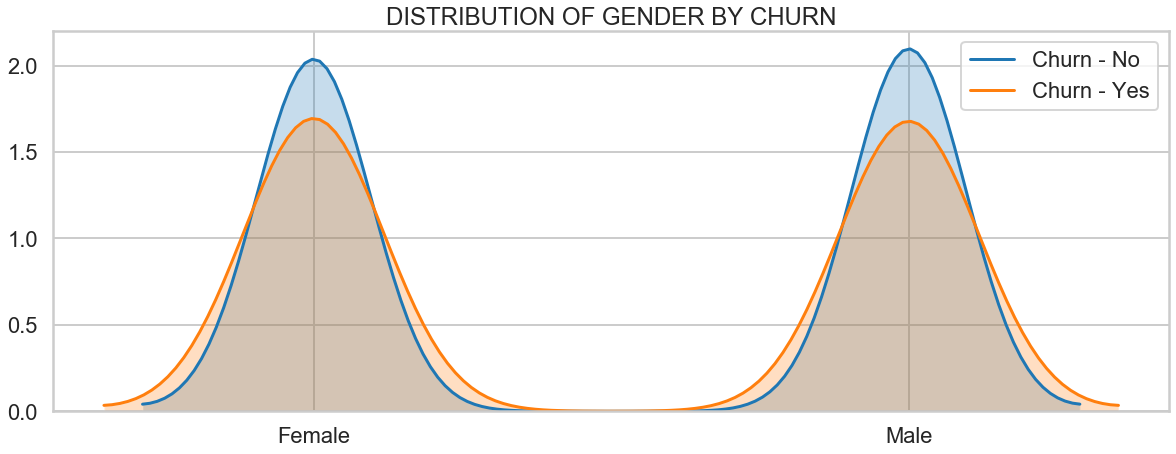

<Figure size 1440x504 with 0 Axes>

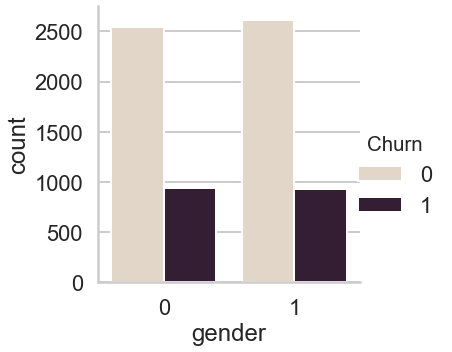

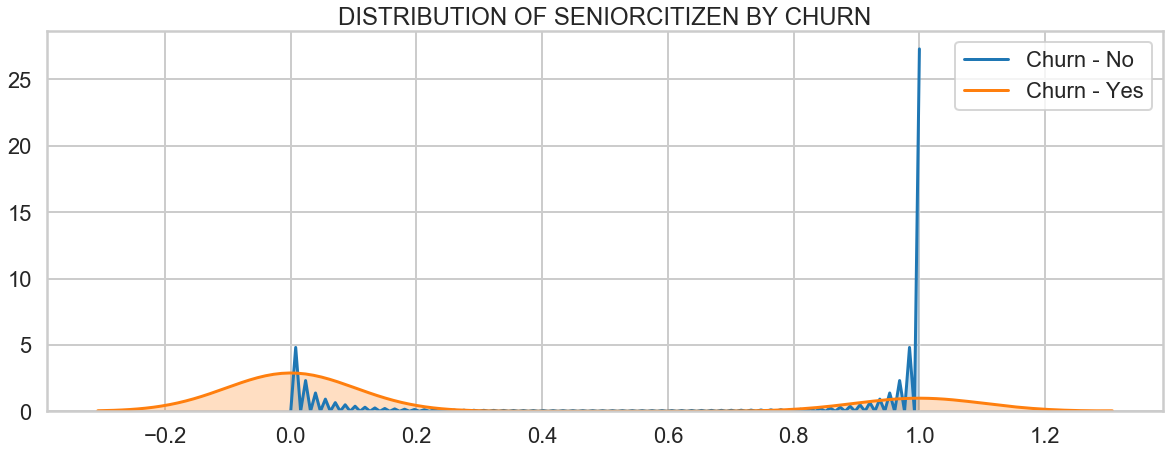

<Figure size 1440x504 with 0 Axes>

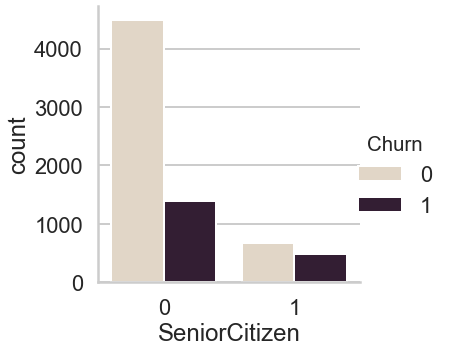

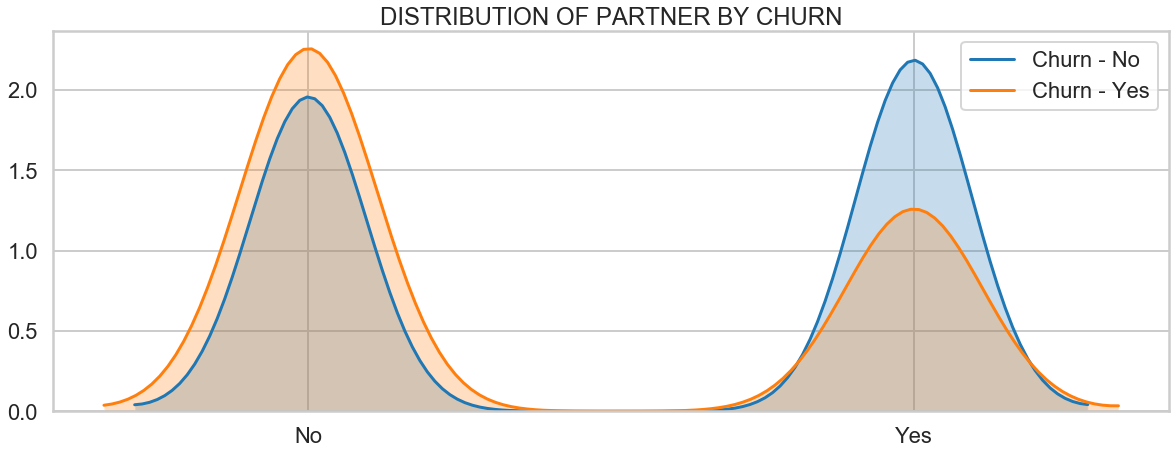

<Figure size 1440x504 with 0 Axes>

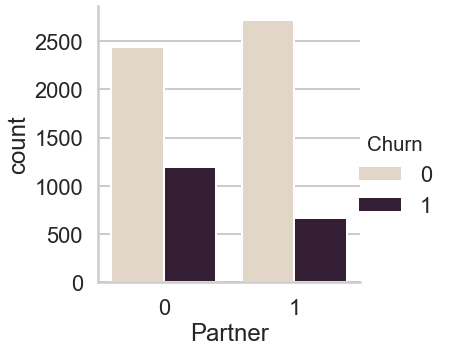

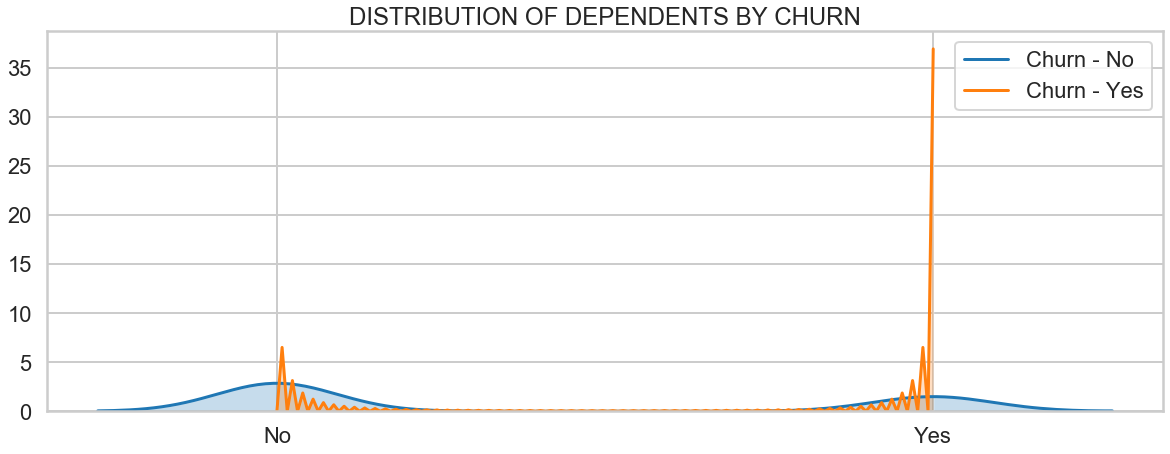

<Figure size 1440x504 with 0 Axes>

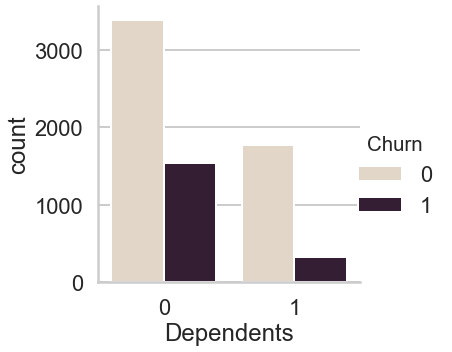

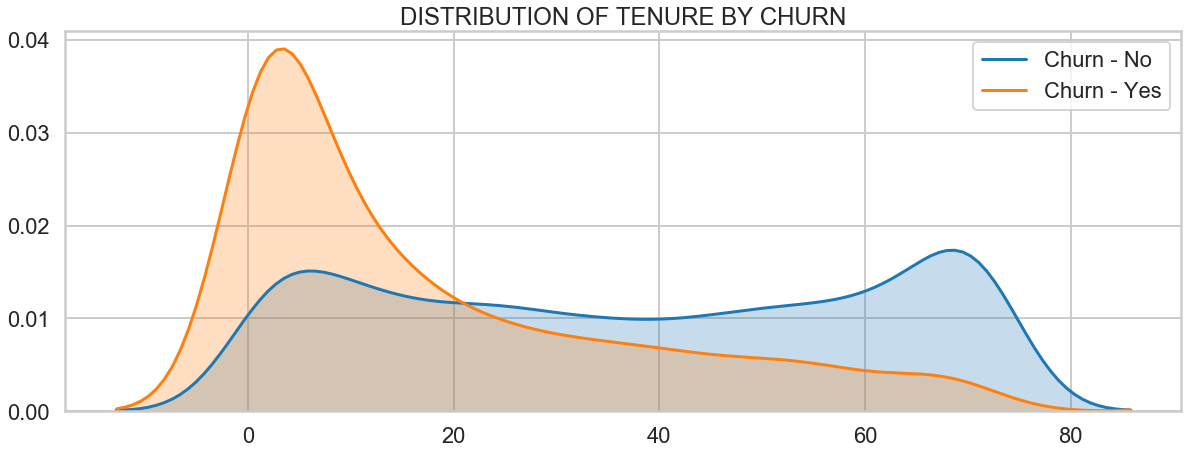

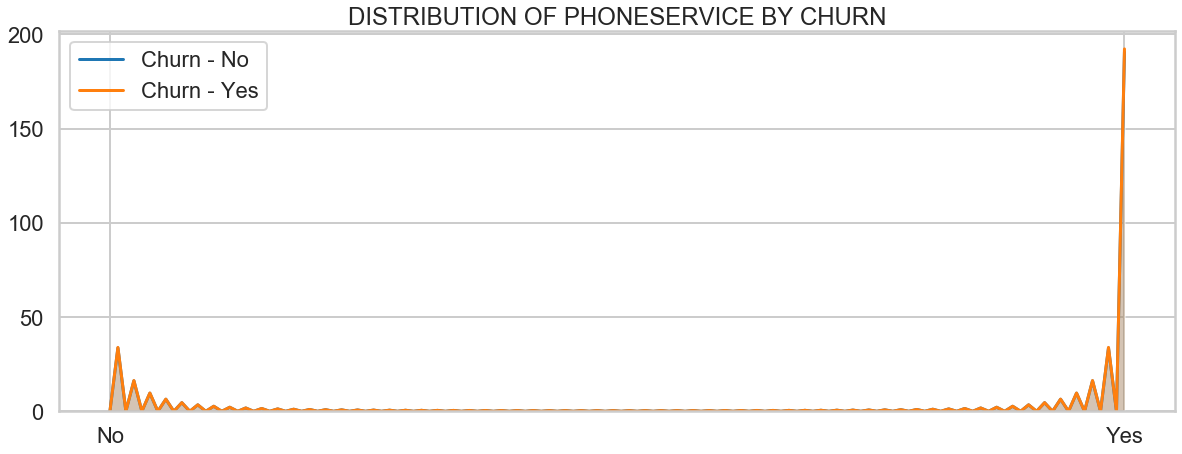

<Figure size 1440x504 with 0 Axes>

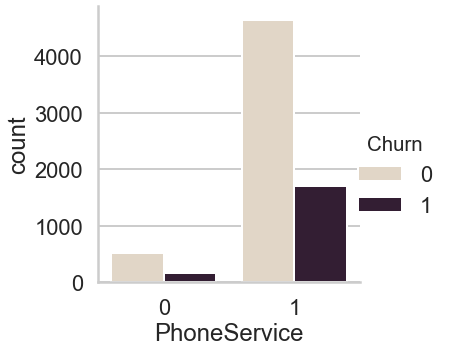

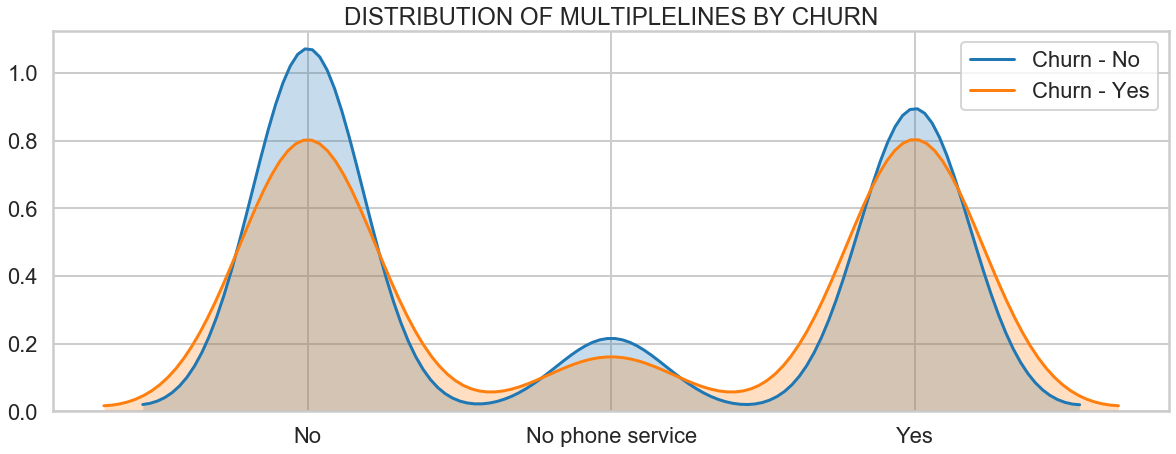

<Figure size 1440x504 with 0 Axes>

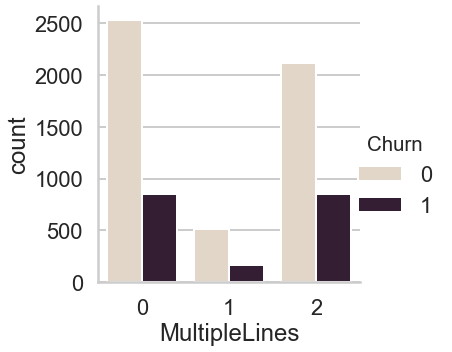

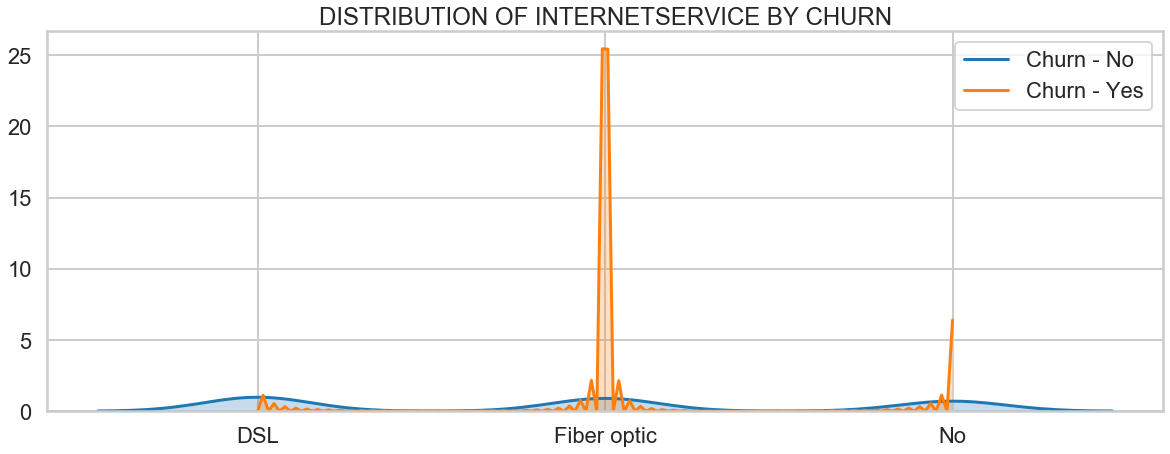

<Figure size 1440x504 with 0 Axes>

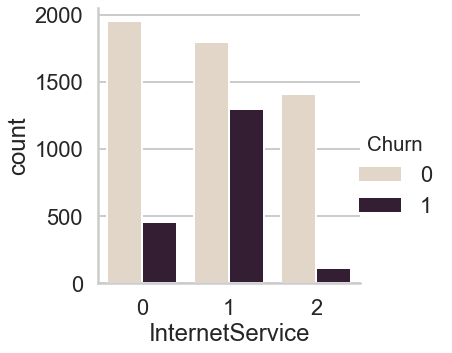

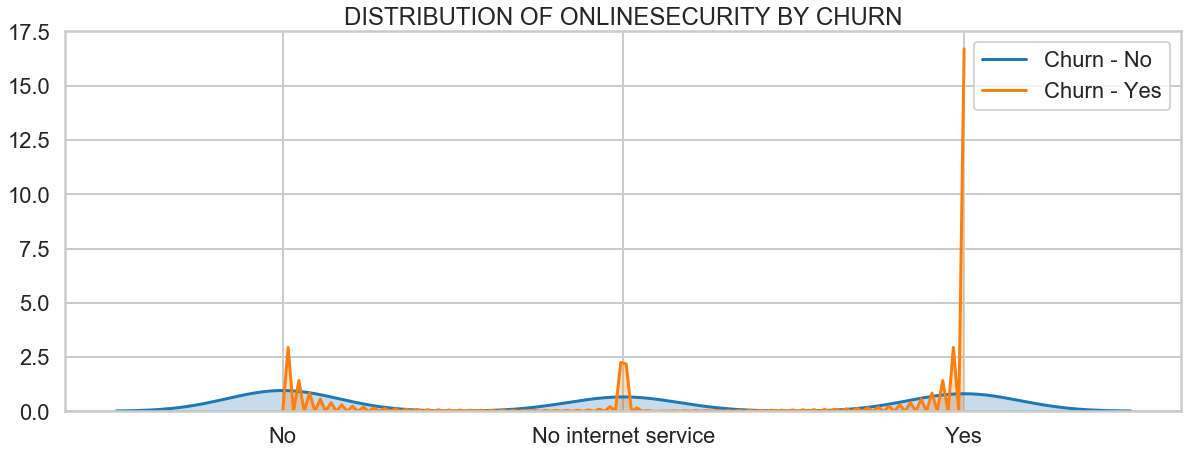

<Figure size 1440x504 with 0 Axes>

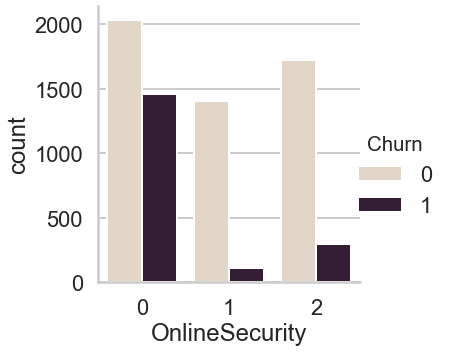

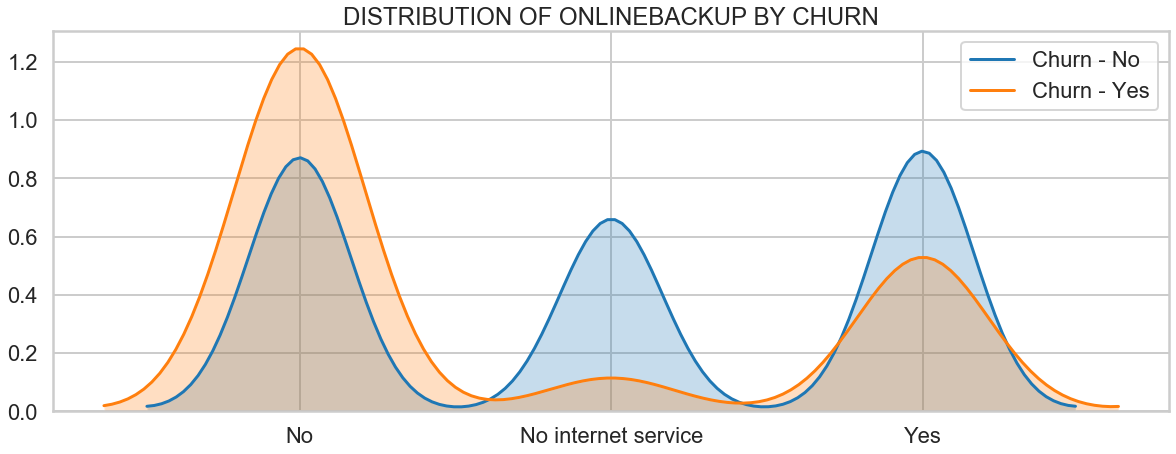

<Figure size 1440x504 with 0 Axes>

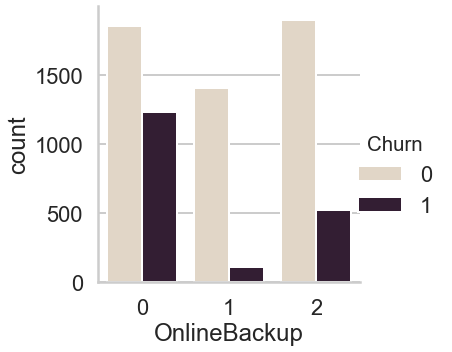

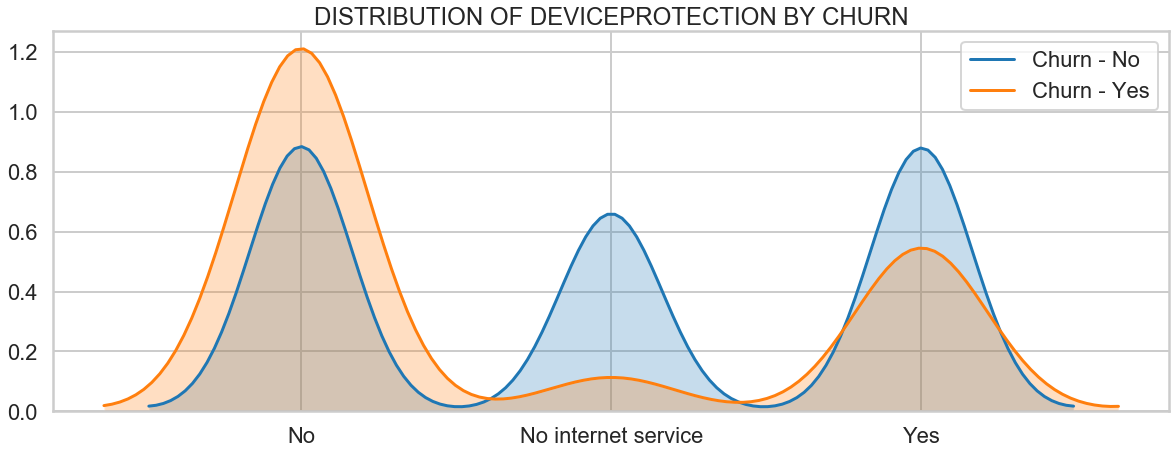

<Figure size 1440x504 with 0 Axes>

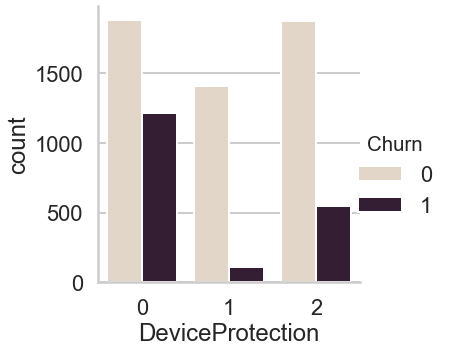

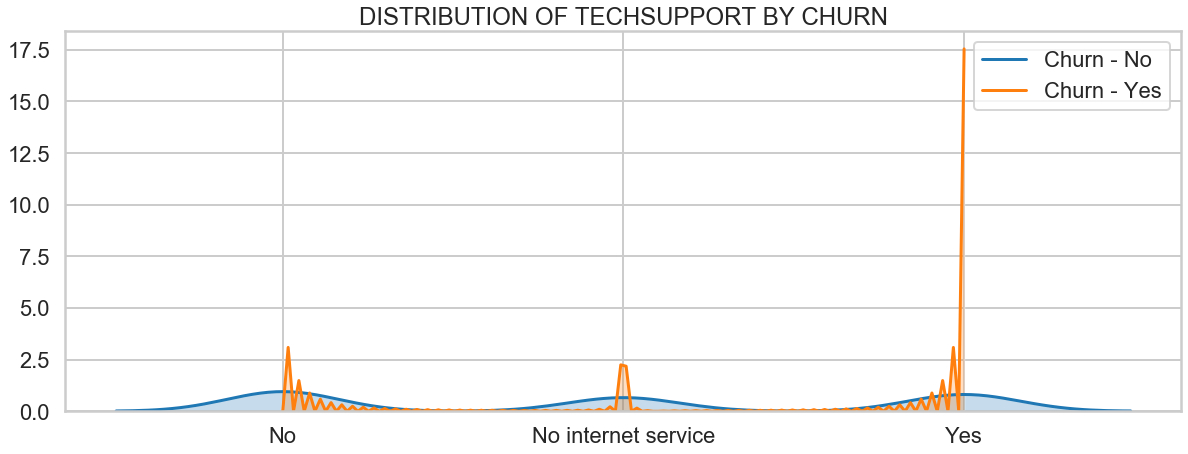

<Figure size 1440x504 with 0 Axes>

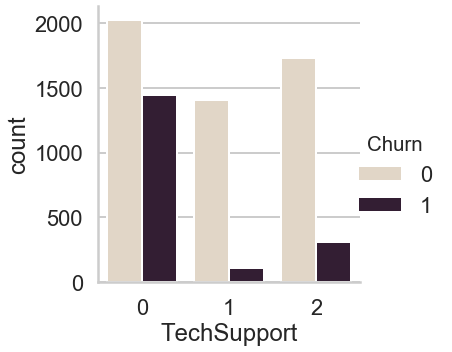

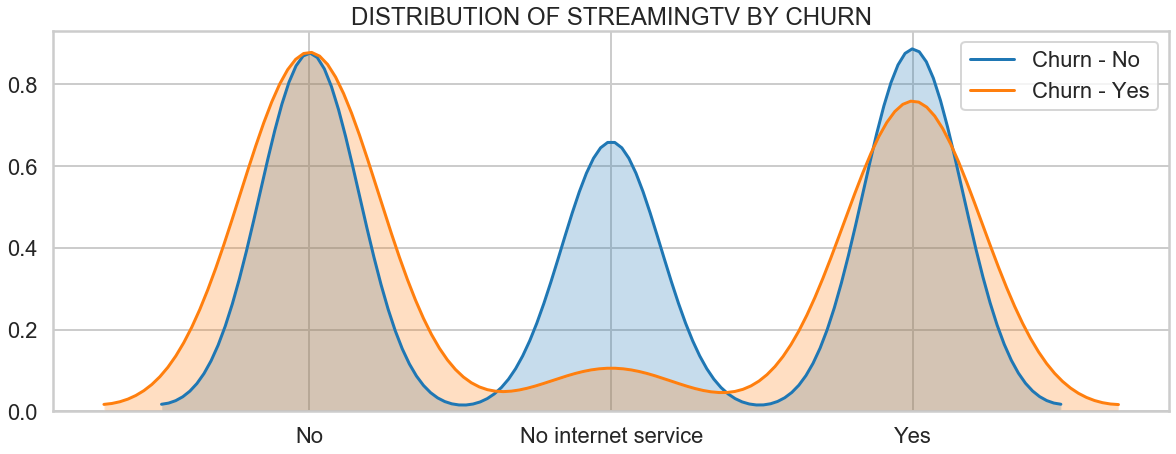

<Figure size 1440x504 with 0 Axes>

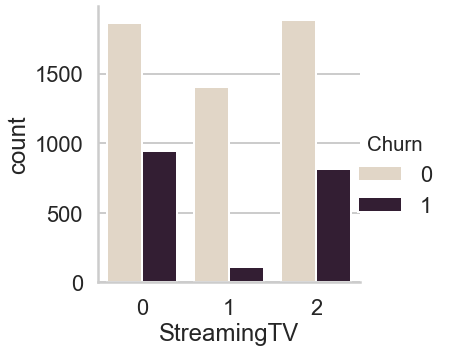

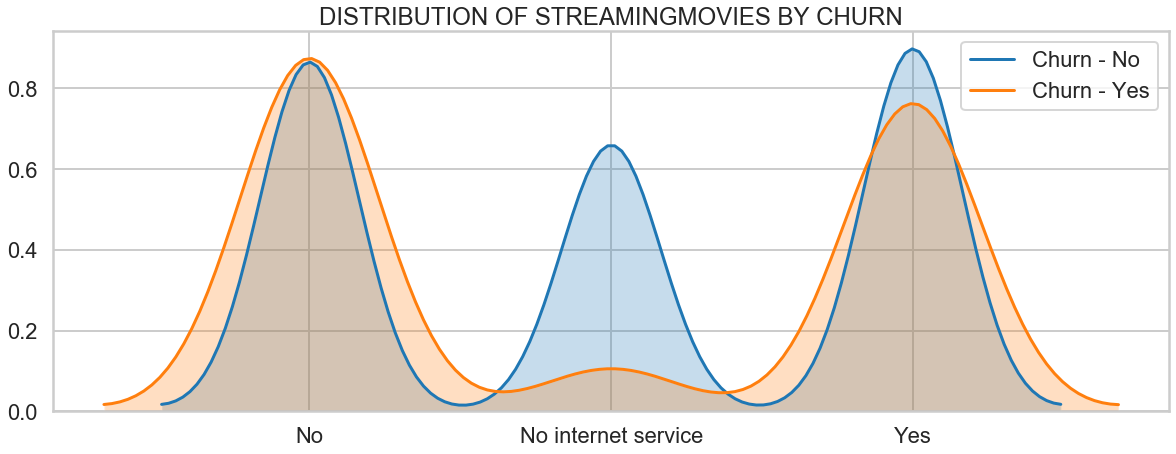

<Figure size 1440x504 with 0 Axes>

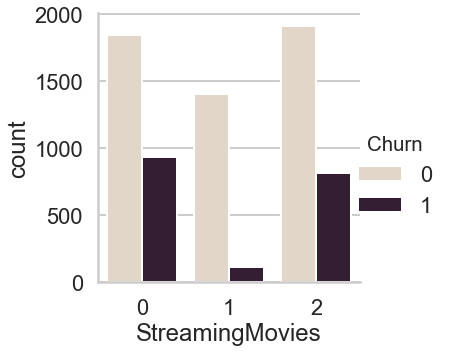

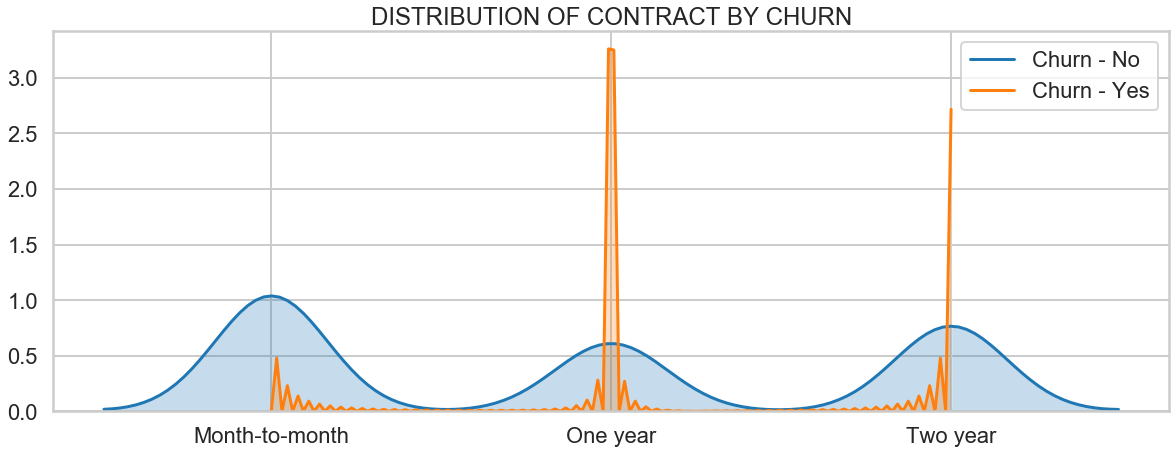

<Figure size 1440x504 with 0 Axes>

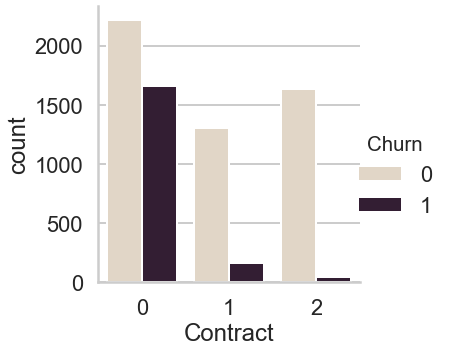

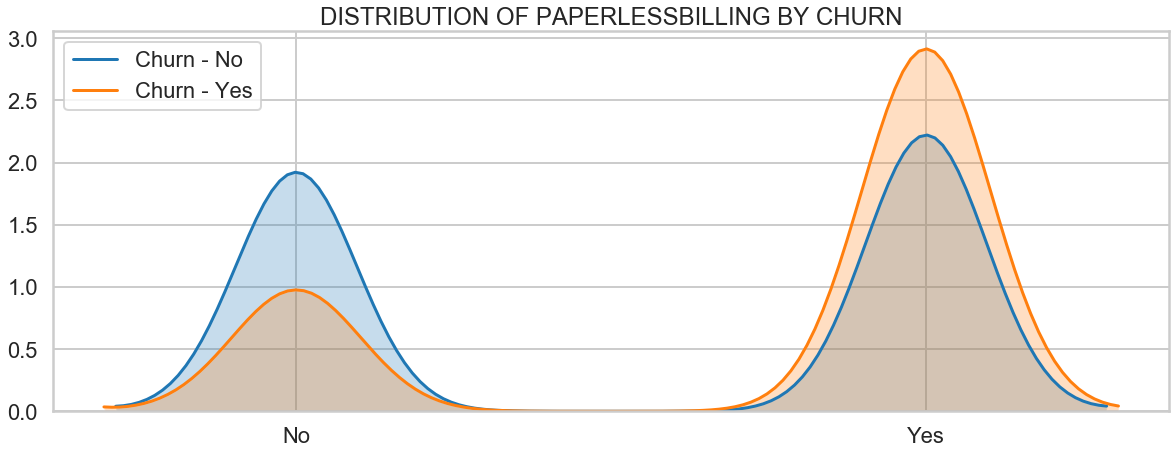

<Figure size 1440x504 with 0 Axes>

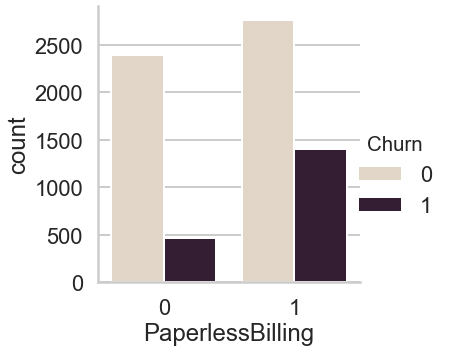

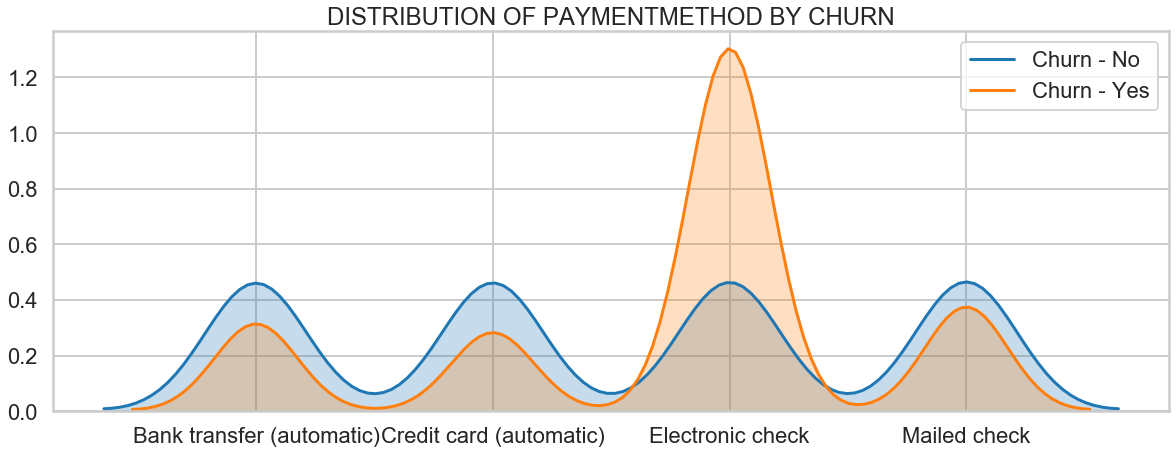

<Figure size 1440x504 with 0 Axes>

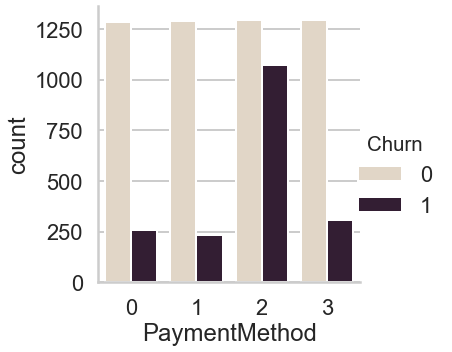

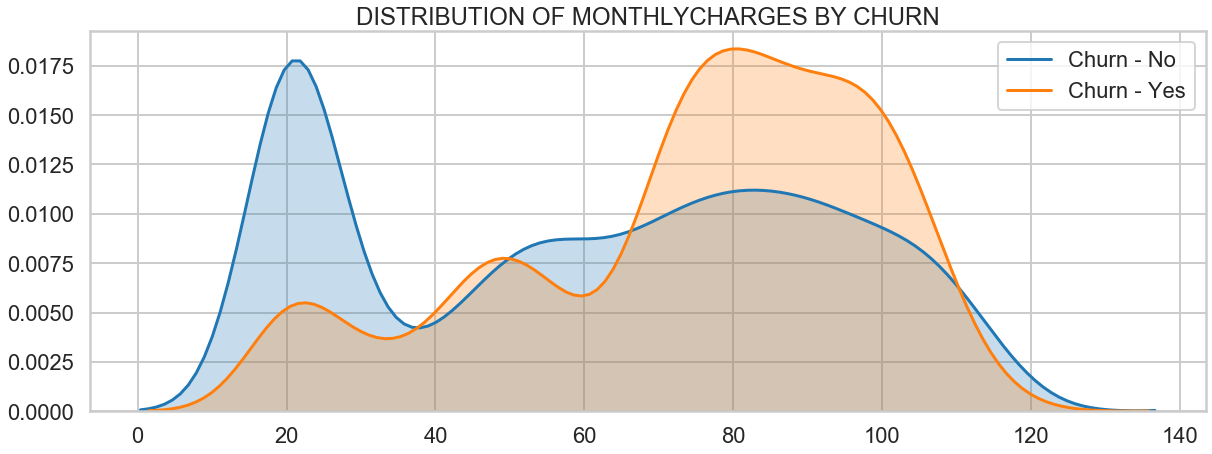

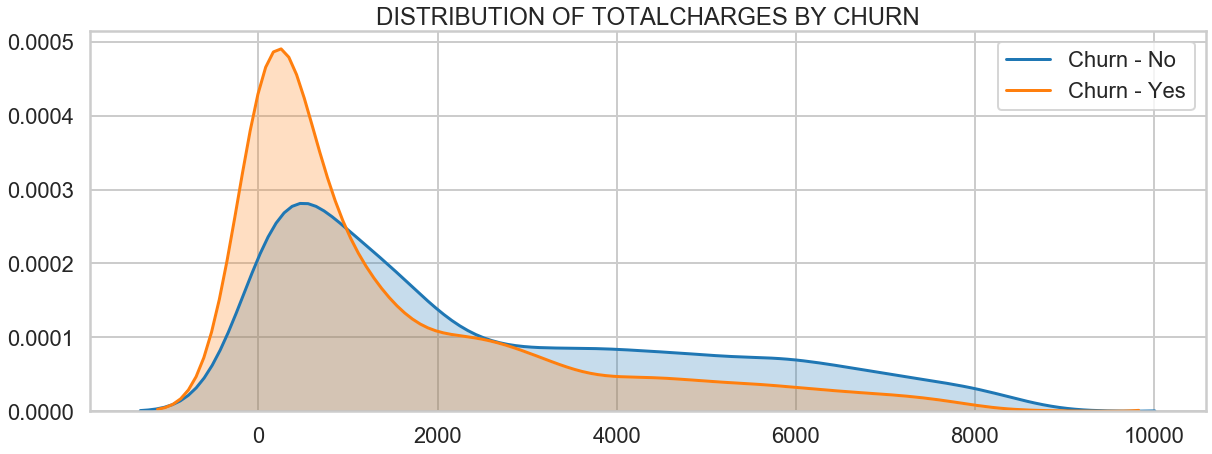

In [14]:
### KDE plot to see distributions by churn
for col in df_clean.columns:
    if col != "Churn":
        kdeplot_churn(col)
        if not col in ["MonthlyCharges", "TotalCharges", "tenure"]:
            plt.figure(figsize=(20,7))
            sns.catplot(x=col, kind="count", hue="Churn", palette="ch:.25", data=df_clean)

## Prepare the Data for Modelling
Now, let us prepare the data for modelling.

### Train-Test Split
The dataset is divided into train set and test set.

The train set is used for building the model, while the test set is used for validating the model.

In [15]:
### Separate the predictors from the target variable
X = df_clean.drop(["Churn"], axis=1)
y = df_clean["Churn"]

print("Size of x (predictors):\t{}\nSize of y (target):\t{}".format(X.shape, y.shape))

Size of x (predictors):	(7032, 19)
Size of y (target):	(7032,)


In [16]:
### Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Size of x_train: (4922, 19) 	 Size of x_test: (2110, 19) 
Size of y_train: (4922,) 	 Size of y_test: (2110,)


In [17]:
print(y_train.value_counts(), '\n', y_test.value_counts())

0    3614
1    1308
Name: Churn, dtype: int64 
 0    1549
1     561
Name: Churn, dtype: int64


Shown above is the distribution of `Churn` data, and we can see that it is imbalanced. The dataset is dominated by rows where `Churn == 0`, and we can make it more balanced using the **resampling technique** performed below.

### Resample

In [18]:
### Concatenate the train data before resampling 
df_train = pd.concat([X_train, y_train], axis=1)
print("DF Train shape:", df_train.shape, "\nDF Train value counts:\n",df_train['Churn'].value_counts())
df_train.head()

DF Train shape: (4922, 20) 
DF Train value counts:
 0    3614
1    1308
Name: Churn, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7105-MXJLL,0,1,1,0,26,1,0,0,0,0,2,0,0,2,1,0,3,60.70,1597.40,0
6754-WKSHP,1,0,0,1,30,1,2,2,1,1,1,1,1,1,1,0,0,25.35,723.30,0
1984-FCOWB,0,0,1,0,70,1,2,1,0,2,2,2,2,2,1,1,2,109.50,7674.55,1
5188-HGMLP,1,1,1,0,54,1,2,1,0,0,0,0,0,0,0,0,0,74.00,3919.15,0
0196-JTUQI,0,0,0,0,9,1,2,1,0,0,0,0,0,0,0,1,1,75.20,633.85,0


In [19]:
### Append the category with highest value counts
df_train_res = df_train[df_train["Churn"]==0]

### Resample minority class
resampled = resample(df_train[df_train["Churn"]==1],
                    replace=True, # sample with replacement
                    n_samples=3614, # match number in majority class
                    random_state=1) # reproducible results
df_train_res = pd.concat([df_train_res, resampled]) 

### Print resampled training set to check
print("Size of df_train_res:", df_train_res.shape, "\nValue counts for Churn:\n", 
      df_train_res["Churn"].value_counts())
df_train_res.head()

Size of df_train_res: (7228, 20) 
Value counts for Churn:
 1    3614
0    3614
Name: Churn, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7105-MXJLL,0,1,1,0,26,1,0,0,0,0,2,0,0,2,1,0,3,60.70,1597.40,0
6754-WKSHP,1,0,0,1,30,1,2,2,1,1,1,1,1,1,1,0,0,25.35,723.30,0
5188-HGMLP,1,1,1,0,54,1,2,1,0,0,0,0,0,0,0,0,0,74.00,3919.15,0
0196-JTUQI,0,0,0,0,9,1,2,1,0,0,0,0,0,0,0,1,1,75.20,633.85,0
8755-IWJHN,1,1,1,0,69,1,2,1,0,2,2,0,0,2,0,1,0,95.35,6382.00,0


In [20]:
X_train_res = df_train_res.drop(["Churn"], axis=1)
y_train_res = df_train_res["Churn"]

print("Size of x_train_res: {}\nSize of y_train_res: {}".format(X_train_res.shape, y_train_res.shape))

Size of x_train_res: (7228, 19)
Size of y_train_res: (7228,)


Eventhough we have resampled data, we will still consider the original data and see which of those datasets enhances model performance.

## Build the Models

Now that our data is prepared for modelling, let us initialize functions that we will use for it.

In [21]:
### Function for computing for the recall of Churn==0
def recall_0(correct, pred):
    return metrics.recall_score(y_true=correct, y_pred=pred, pos_label=0, average="binary")

### Function for getting and displaying score
def score_card(model, predicted):
    ## Print classification report
    print( "Classification report for {}:\n{}".format( model, 
                                                metrics.classification_report(y_test, predicted) ) )

    ## Cross-Validation
    scoring = {
        "recall_0": metrics.make_scorer(recall_0),
        "accuracy": "accuracy",
        "recall": "recall",
        "precision": "precision",
        "f1": "f1"
    }
    cv_scores = cross_validate(model, X, y, scoring=scoring, cv=10)
    
    ## Return scores
    return { c: np.mean(cv_scores[c]) for c in cv_scores }

In [22]:
### Initialized for easy plotting of confusion matrix
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

### Pipeline
For quickly choosing the best model, we can construct pipelines for each of the machine algorithms:
* Logistic Regression
* K-Nearest Neighbors
* Naive Bayes
* Decision Trees
* Random Forest Classifier
* XGBoost

We'll also use two types datasets per algorithm:
* Resampled Data
* Original Data

The top 3 models with the highest **accuracy scores** are used for further modelling and tuning.

In [23]:
### Make pipelines
pipelines = {
    "LogReg": make_pipeline(StandardScaler(), LogisticRegression()),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "GNB": make_pipeline(StandardScaler(), GaussianNB()),
    "DTree": make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    "RF": make_pipeline(StandardScaler(), RandomForestClassifier()),
    "XGB": make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

In [24]:
### Initialize dict for results
pipe_results = {}

### Iterate through pipelines to get each accuracy score
for pipe in pipelines:
    model_orig = pipelines[pipe]
    model_orig.fit(X_train, y_train)
    
    pipe_results[pipe] = [metrics.accuracy_score(y_test, model_orig.predict(X_test)) * 100]
    
    model_res = pipelines[pipe]
    model_res.fit(X_train_res, y_train_res)
    
    pipe_results[pipe].append(metrics.accuracy_score(y_test, model_res.predict(X_test)) * 100)

### Print accuracy scores got per pipeline
print("-------Accuracy Scores per Pipeline-------")
print("Algorithm\tOriginal\tResampled")
for pipe in pipe_results:
    print( "%s\t\t%.3f\t\t%.3f" % (pipe, pipe_results[pipe][0], pipe_results[pipe][1]) )

-------Accuracy Scores per Pipeline-------
Algorithm	Original	Resampled
LogReg		80.142		73.602
KNN		75.498		67.156
GNB		74.645		72.986
DTree		71.801		72.085
RF		78.199		77.346
XGB		80.332		74.882


From the results above, the top 3 models are:
1. XGBoost Classifier
1. Logistic Regression
1. Random Forest Classifier

Below, we'll try to tune these models using `GridSearchCV` and find out which ones are the best for this use case. Note that not all of the parameters will be tuned due to limits in memory.

### Random Forest Classifier

#### Build/Train the Model
##### Find Best Parameters

In [26]:
rf_parameters = {
    "randomforestclassifier__n_estimators" : [n for n in np.arange(100,800,200)], 
    "randomforestclassifier__criterion" : ["gini", "entropy"]
}

rf_grid = GridSearchCV(pipelines["RF"], param_grid = rf_parameters,
                           cv = 5, scoring="accuracy")

rf_grid.fit(X, y)
print("-----RF GridSearch-----")
print( "Best Params: {}\nBest Score: {}".format(rf_grid.best_params_, rf_grid.best_score_) )

-----RF GridSearch-----
Best Params: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 100}
Best Score: 0.7945108077360638


##### Use best parameters

In [32]:
### Instantiate the algorithm
rf = RandomForestClassifier(criterion="entropy", n_estimators=100)

### Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Validate the Model

##### Classification Report

In [33]:
### Predict on test set
rf_pred = rf.predict(X_test)

### Get score report for model
rf_score = score_card(rf, rf_pred)
pd.DataFrame.from_dict({"Cross-Validation Scores":rf_score})

Classification report for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



,Cross-Validation Scores
fit_time,8.169977
score_time,0.652181
test_accuracy,0.794935
test_f1,0.563180
test_precision,0.650402
test_recall,0.497059
test_recall_0,0.902765


##### Confusion Matrix

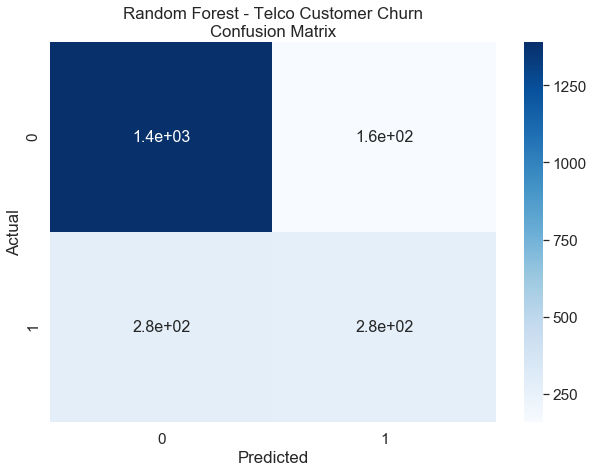

In [34]:
### Plot the confusion matrix
confmatrix(rf_pred, "Random Forest - Telco Customer Churn\nConfusion Matrix")

### Logistic Regression

#### Build/Train the Model
##### Find Best Parameters

In [27]:
logreg_parameters = {
    "logisticregression__penalty" : ["l1", "l2"], 
    "logisticregression__C" : [n for n in np.arange(0.5,3,0.5)]
}

logreg_grid = GridSearchCV(pipelines["LogReg"], param_grid = logreg_parameters,
                           cv = 5, scoring="accuracy")

logreg_grid.fit(X, y)
print("-----LogReg GridSearch-----")
print( "Best Params: {}\nBest Score: {}".format(logreg_grid.best_params_, logreg_grid.best_score_) )

-----LogReg GridSearch-----
Best Params: {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1'}
Best Score: 0.801905574516496


##### Use best parameters

In [35]:
### Instantiate the algorithm
logreg = LogisticRegression(C=0.5, penalty="l1")

### Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Validate the Model

##### Classification Report

In [36]:
### Predict on test set
logreg_pred = logreg.predict(X_test)

### Get score report for model
logreg_score = score_card(logreg, logreg_pred)
pd.DataFrame.from_dict({"Cross-Validation Scores":logreg_score})

Classification report for LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.73      2110
weighted avg       0.79      0.80      0.80      2110



,Cross-Validation Scores
fit_time,0.696976
score_time,0.076322
test_accuracy,0.801480
test_f1,0.592991
test_precision,0.650664
test_recall,0.545219
test_recall_0,0.894247


##### Confusion Matrix

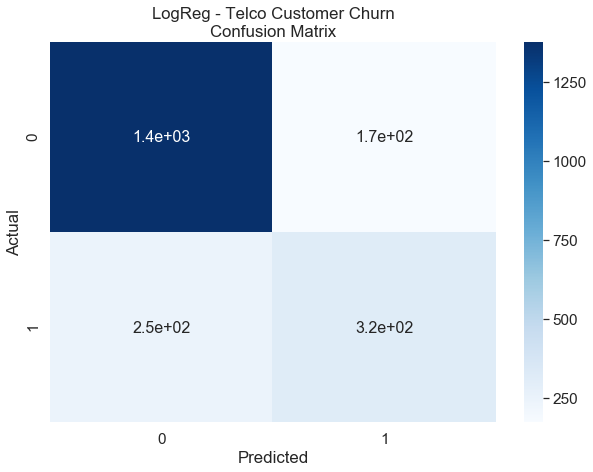

In [37]:
### Plot the confusion matrix
confmatrix(logreg_pred, "LogReg - Telco Customer Churn\nConfusion Matrix")

### XGBoost

#### Build/Train the Model
##### Find Best Parameters

In [31]:
xgb_parameters = {
    "gradientboostingclassifier__loss" : ["deviance", "exponential"], 
    "gradientboostingclassifier__n_estimators" : [n for n in np.arange(100,800,200)]
}

xgb_grid = GridSearchCV(pipelines["XGB"], param_grid = xgb_parameters,
                           cv = 5, scoring="accuracy")

xgb_grid.fit(X, y)
print("-----XGB GridSearch-----")
print( "Best Params: {}\nBest Score: {}".format(xgb_grid.best_params_,xgb_grid.best_score_) )

-----XGB GridSearch-----
Best Params: {'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__n_estimators': 100}
Best Score: 0.8056029579067122


##### Use best parameters

In [38]:
### Instantiate the algorithm
xgb = GradientBoostingClassifier(loss="deviance", n_estimators=100)

### Fit the model
xgb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Validate the Model

##### Classification Report

In [39]:
### Predict on test set
xgb_pred = xgb.predict(X_test)

### Get score report for model
xgb_score = score_card(xgb, xgb_pred)
pd.DataFrame.from_dict({"Cross-Validation Scores":xgb_score})

Classification report for GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79  

,Cross-Validation Scores
fit_time,6.034562
score_time,0.133802
test_accuracy,0.803471
test_f1,0.583099
test_precision,0.669511
test_recall,0.517388
test_recall_0,0.907029


##### Confusion Matrix

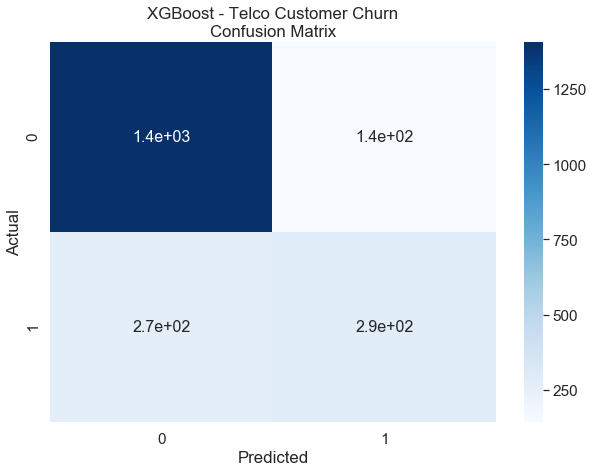

In [40]:
### Plot the confusion matrix
confmatrix(xgb_pred, "XGBoost - Telco Customer Churn\nConfusion Matrix")

## Summary of the Results

In [44]:
### Compile results into dataframe
df_results = pd.DataFrame.from_dict({
    "Logistic Regression": logreg_score, "XGBoost": xgb_score,
    "Random Forest": rf_score}, orient="index")

### Convert scores into percentages
for m in ["test_recall_0", "test_accuracy", "test_recall", "test_precision", "test_f1"]:
    df_results[m] = df_results[m] * 100

### Show resulting dataframe
df_results

,fit_time,score_time,test_recall_0,test_accuracy,test_recall,test_precision,test_f1
Logistic Regression,0.696976,0.076322,89.424715,80.148018,54.521879,65.066414,59.299086
Random Forest,8.169977,0.652181,90.276528,79.493538,49.705882,65.040211,56.317993
XGBoost,6.034562,0.133802,90.702922,80.347064,51.738830,66.951062,58.309915


In [52]:
### Find out the best model based on all metrics
print("-----Best Model per Metric-----")

## Initiate dict of best model pre metric
best = {"test_recall_0":0, "test_accuracy":0, "test_recall":0, "test_precision":0, "test_f1":0}

## Iterate through the dict and columns of df_results to find the max value and index
for m in best:
    best[m] = { "Model":df_results[m].idxmax(), "Score":df_results[m].max() }

## Display the results
df_best = pd.DataFrame.from_dict(best, orient="index")
print(df_best["Model"].value_counts()[:1])
df_best

-----Best Model per Metric-----
XGBoost    3
Name: Model, dtype: int64


,Model,Score
test_accuracy,XGBoost,80.347064
test_f1,Logistic Regression,59.299086
test_precision,XGBoost,66.951062
test_recall,Logistic Regression,54.521879
test_recall_0,XGBoost,90.702922


In this exercise, we tried categorical visualizations from `Seaborn` which are: 
* `catplot` - like a bar plot but for categories
* `kdeplot` - like a smoothened histogram

We also explored `SKLearn`'s `make_pipeline` which is very useful in saving time and typing when modelling.

Aside from that, we tried `GridSearchCV` to find the best parameters to use per model based on a dictionary of lists we defined.

For this data, we would want high recall to better detecting customers who are in risk of churning. **Logistic Regression may have given the best score for recall but that score is still low.**

So in this case, **XGBoost is still the best model** because eventhough it has less recall, **XGBoost gave the best performance for most of the metrics**. It has **high accuracy, precision and recall(for 0).** 

## Special Thanks
* [FTW Foundation](https://ftwfoundation.org)